In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
file_name = 'BostonHousing.csv'
df = pd.read_csv(file_name)

In [9]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,cost
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'b', 'lstat']

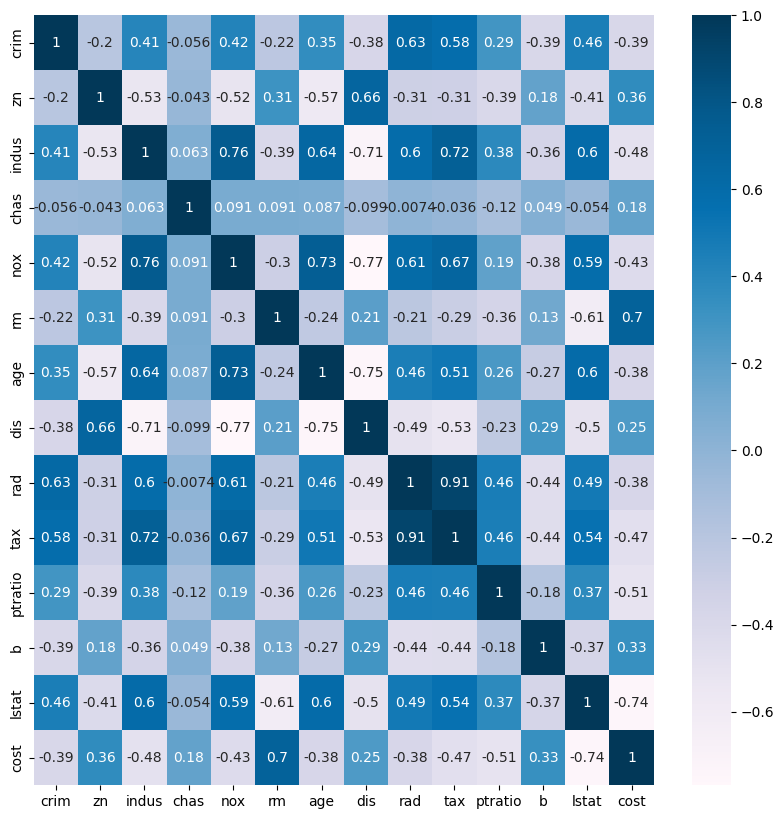

In [11]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [21]:
least_loss_model = None
lowest_mse = float('inf')
cortarget = [0.2, 0.25, 0.3, 0.35, 0.4]
random_state = [i for i in range(1,1000)]

In [22]:
for randomstate in random_state:
    cor_target = abs(cor['cost'])
        
    for threshold in cortarget:
        relevant_features = cor_target[cor_target >= threshold].index.tolist()
            
        if 'cost' in relevant_features:
            relevant_features.remove('cost')

        if not relevant_features:
            continue  # Skip if no relevant features

        x = df[relevant_features].values
        y = df['cost'].values

        # Split into train and temporary (validation + test) sets
        x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=randomstate)  # 60% train, 40% temporary

        # Split the temporary set into validation and test sets
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=randomstate)  # 50% validation, 50% test of temporary

        # Train the model on the training set
        linear_regression = LinearRegression()
        linear_regression.fit(x_train, y_train)

        # Validate the model on the validation set
        y_pred_val = linear_regression.predict(x_val)
        mse_val = mean_squared_error(y_val, y_pred_val)

        # If the model performs well on validation, evaluate it on the test set
        if mse_val < lowest_mse:
            y_pred_test = linear_regression.predict(x_test)
            mse_test = mean_squared_error(y_test, y_pred_test)

            # Store the best model
            if mse_test < lowest_mse:
                lowest_mse = mse_test
                least_loss_model = linear_regression

In [24]:
print(lowest_mse)

13.273803436090704
